# Python Machine Learning for Biology
# Evaluation Metrics

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline

So far, we have used:
* **Regression problems**: Mean Absolute Error, Mean Squared Error, Root Mean Squared Error
* **Classification problems**: Classification accuracy (so far)--> there are lots of other ways to evaluate classifiers, and we'll learn them now

### Classification Accuracy

#### Let's get the classification accuracy of a logistic regression fit to the cancer dataset
Classification accuracy is the proportion of correct predictions.

In [2]:
cancer = pd.read_csv('data/cancer.csv')

In [3]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X = cancer.iloc[:, 1:]

In [5]:
y = cancer['diagnosis']

In [6]:
le = LabelEncoder()

In [7]:
y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [9]:
logreg = LogisticRegression()

In [10]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
print(metrics.accuracy_score(y_test, y_pred))

0.958041958041958


### Null Accuracy
The accuracy that can be achieved by always predicting the most frequent class

In [13]:
class_le = LabelEncoder()

In [14]:
y_test = class_le.fit_transform(y_test)
y_pred = class_le.fit_transform(y_pred)

In [15]:
y_test = pd.Series(y_test)
y_pred = pd.Series(y_pred)

In [16]:
y_test.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

In [17]:
y_pred.head()

0    1
1    0
2    0
3    0
4    1
dtype: int64

In [18]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    91
1    52
dtype: int64

In [19]:
# calculate the percentage of ones
y_test.mean()

0.36363636363636365

In [20]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6363636363636364

In [21]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6363636363636364

In [22]:
# calculate null accuracy (for multi-class classification problems)
y_test.value_counts().head(1) / len(y_test)

0    0.636364
dtype: float64

In [23]:
# print the first 25 true and predicted responses
print('True:', y_test.values[0:25])
print('Pred:', y_pred[0:25])

True: [1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0]
Pred: 0     1
1     0
2     0
3     0
4     1
5     0
6     0
7     1
8     1
9     0
10    0
11    0
12    0
13    0
14    1
15    0
16    0
17    0
18    1
19    0
20    1
21    1
22    0
23    0
24    0
dtype: int64


* Classification accuracy is the easiest classification metric to understand
* But, it does not tell you the underlying distribution of response values
* And, it does not tell you what "types" of errors your classifier is making

### Dummy Classifiers

In [24]:
from sklearn.dummy import DummyClassifier

In [25]:
dummy_majority = DummyClassifier(strategy = 
                                 'most_frequent').fit(X_train,y_train)

In [26]:
dummy_predictions = dummy_majority.predict(X_test)

In [27]:
dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
dummy_predictions = le.fit_transform(dummy_predictions)

In [29]:
print(metrics.accuracy_score(y_test, dummy_predictions))

0.6363636363636364


* Dummy Classifiers serves as a sanity check for your classifier's performance
* They provide a null metric
* Dummy Classifiers should not be used for real problems

** Other commonly-used `strategy` parameters for DummyClassifiers**
* `most_frequent`: predicts the most frequent label in the training set
* `stratified`: random predictions based on training set distribution
* `uniform`: generates predictions uniformly at random
* `constant`: always predicts constant label provided by the user (useful for calculating F1-score)

#### What if my classifier accuracy is close to null accuracy?
This could be a sign of
* ineffective, erroneous, or missing features
* poor choice of kernel or hyperparameters
* large class imbalance (AUC may be a better score)

### Confusion matrix
Table that describes the performance of a classification model

<img src="assets/confusionmatrix.png"/>

#### Get the confusion matrix for the logistic regression of the cancer dataset

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
print(metrics.confusion_matrix(y_test, y_pred))

[[89  2]
 [ 4 48]]


Every observation in the testing set is represented in exactly one box
It's a 2x2 matrix because there are 2 response classes
It tallies how many of the two types of correct predictions were made and the two types of incorrect predictions were made.
#### Basic terminology

* **True Positives (TP):** we correctly predicted that the sample is malignant
* **True Negatives (TN):** we correctly predicted that the sample is benign
* **False Positives (FP):** we incorrectly predicted that the sample is malignant (a "Type I error")
* **False Negatives (FN):** we incorrectly predicted that the sample is benign (a "Type II error")

In [32]:
confusion = metrics.confusion_matrix(y_test, y_pred)

In [33]:
TP = confusion[0, 0]
TN = confusion[1, 1]
FP = confusion[0, 1]
FN = confusion[1, 0]


## Independent Work
Get the confusion matrix from one of the Dummy Classifiers. How does it compare to the model's confusion matrix? 


**Bonus** Try out a different classifier and get the confusion matrix for it.

### Metrics Calculated from the Confusion Matrix
<img src="assets/confusionmatrixmetrics.png"/>

**Classification accuracy: ** overall, how often is the classifier correct?

In [34]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred))

0.958041958041958
0.958041958041958


**Classification Error:** Overall, how often is the classifier incorrect?
* Also known as "Misclassification Rate"

In [35]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred))

0.04195804195804196
0.04195804195804198


**Sensitivity:** When the actual value is positive, how often is the prediction correct?
* How "sensitive" is the classifier to detecting positive instances?
* Also known as "True Positive Rate" or "Recall"

In [36]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred, pos_label=0))

0.956989247311828
0.978021978021978


**Specificity:** When the actual value is negative, how often is the prediction correct?
* How "specific" (or "selective") is the classifier in predicting positive instances?

In [37]:
print(TN / float(TN + FP))

0.96


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [38]:
print(FP / float(TN + FP))

0.04


**Precision:** When a positive value is predicted, how often is the prediction correct?
* How "precise" is the classifier when predicting positive instances?

In [39]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_pred))

0.978021978021978
0.96


**F-1 Score:** combines precision and accuracy 

2*((precision X recall)/(precision+recall))

In [40]:
print(metrics.f1_score(y_test, y_pred))

0.9411764705882353


#### Classification Report

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97        91
          1       0.96      0.92      0.94        52

avg / total       0.96      0.96      0.96       143



### Demystifying Precision and Recall
<img src="assets/precisionrecall.png"/>

#### Low Recall, Low Precision
<img src="assets/lowPlowR.png"/>
<img src="assets/legen.jpeg"/>
* Let’s say everything inside the solid lines are pictures of actual hot dogs. 
* Everything within the dotted line is what the model thought was a picture of hot dogs.
* Everything in the square is the entire dataset. 
* True negatives (denoted tn) samples in your data, which you classified as not belonging to your class correctly. Eg. your “hot dog” vs “not hot dog” image classifier correctly classified your image of a car as not being a “hot dog”.
* False negatives (denoted fn) samples in your data, which you classified as not belonging to your class, incorrectly. Eg. your “hot dog” vs “not hot dog” image classifier incorrectly classified an image of a messed up “hot dog” as not being a “hot dog”.
* True positives (denoted tp) samples in your data, which you classifed as belonging to your class correctly. Eg. your “hot dog” vs “not hot dog” classifier correctly classifies a “hot dog” as being a “hot dog”.
* False positives (denoted fp) samples in your data, which you classified as belonging to your class incorrectly. Eg. your “hot dog” vs “not hot dog” classifier incorrectly classifies a hamburger as being a “hot dog”.

#### High Recall, Low Precision
<img src="assets/highRlowP.png"/>
* Our classifier casts a very wide net, catches a lot of fish, but also a lot of other things.
* Our classifier thinks a lot of things are “hot dogs”; legs on beaches, fries and whatnot. 
* However it also thinks a lot of “hot dogs” are “hot dogs”. 
* So from our set of images we got a lot of images classified as “hot dogs”, many of them was in the set of actual “hot dogs”, however a lot of them were also “not hot dogs”.

#### Low Recall, High Precision
<img src="assets/lowRhighP.png"/>
* Our classifier casts a very small but highly specialized net, does not catch a lot of fish, but there is almost only fish in the net.
* Our classifier is very picky, and does not think many things are hot dogs. 
* All the images it thinks are “hot dogs”, are really “hot dogs”. 
* However it also misses a lot of actual “hot dogs”, because it is so very picky. 

#### High Recall, High Precision
<img src="assets/highRhighP.png"/>
* The holy grail, our fish net is wide and highly specialised. 
* We catch a lot of fish (almost all of it) and we almost get only fish, nothing else.
* Our classifier is very good, it is very picky, but still it gets almost all of the images of “hot dogs” which are “hot dogs” correct. 
* We are happy!

Many other metrics can be computed as well: F1 score, Matthews correlation coefficient, etc.

**Conclusion:**
* Confusion matrix gives you a more complete picture of how your classifier is performing
* Also allows you to compute various classification metrics, and these metrics can guide your model selection

**Which metrics should you focus on?**
* Choice of metric depends on your objective
* Recall-oriented tasks: search and information extraction in legal discovery, tumor detection, tasks paired with human experts to weed out false positives
* Precision-oriented tasks: search engine ranking, query suggestions, document classification, many customer-facing tasks (users remember failures)

***Which matters more for your research problem?***

### Adjusting the classification threshold
Like a metal detector being adjusted to look for larger and smaller bits of metal.

In [43]:
logreg.predict(X_test)[0:10]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [44]:
y_pred_prob = logreg.predict_proba(X_test)[0:10, :]

So `.predict` is using these probabilities to choose which class it predicts (if greater than 50%). If we adjust this threshold, we can adjust the sensitivity and specificity. 

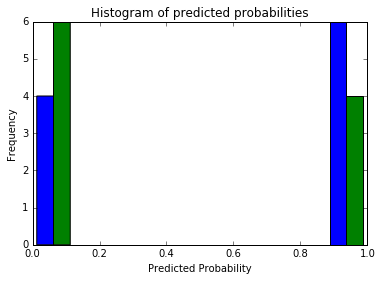

In [45]:
plt.hist(y_pred_prob, bins = 8)
plt.xlim(0,1)
plt.title("Histogram of predicted probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.show()

#### Decrease the threshold for predicting malignancy to increase the sensitivity of the classifier

In [46]:
y_pred_prob

array([[3.32262840e-04, 9.99667737e-01],
       [9.85305805e-01, 1.46941951e-02],
       [9.99152278e-01, 8.47722235e-04],
       [9.11845959e-01, 8.81540409e-02],
       [1.78042436e-07, 9.99999822e-01],
       [9.88666148e-01, 1.13338520e-02],
       [9.64587533e-01, 3.54124665e-02],
       [3.54383189e-13, 1.00000000e+00],
       [1.47097201e-03, 9.98529028e-01],
       [9.96016543e-01, 3.98345670e-03]])

In [47]:
from sklearn.preprocessing import binarize
y_pred = binarize(y_pred_prob, 0.3)

In [48]:
y_pred_prob[0:10]

array([[3.32262840e-04, 9.99667737e-01],
       [9.85305805e-01, 1.46941951e-02],
       [9.99152278e-01, 8.47722235e-04],
       [9.11845959e-01, 8.81540409e-02],
       [1.78042436e-07, 9.99999822e-01],
       [9.88666148e-01, 1.13338520e-02],
       [9.64587533e-01, 3.54124665e-02],
       [3.54383189e-13, 1.00000000e+00],
       [1.47097201e-03, 9.98529028e-01],
       [9.96016543e-01, 3.98345670e-03]])

In [49]:
y_pred

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

* Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
* Threshold can be adjusted to increase sensitivity or specificity
* Sensitivity and specificity have an inverse relationship

## Independent Exercise
* Calculate the confusion matrix for the diabetes dataset after doing a support vector machine with a kernel of your choice.  
* Get the confusion matrix.
* Get the metrics from the confusion matrix. 
* What can you say about the precision and recall of your model?

### ROC Curves and Area Under the Curve (AUC)
*Wouldn't it be nice if we could see how sensitivity and specificity are affected by various thresholds, without actually changing the threshold?*

**ROC curves to the rescue!**

**Receiver Operator Curves** tell us about the false positive and true positive rates. A diagonal line would be the same as random guessing. If the ROC curve falls below the diagonal, it is worse than random guessing. A perfect classifier would fall on the edge of the top left corner (true positive rate of 1, false positive rate of 0). The **Area Under the Curve (AUC)** score tells us about the performance of the model. 

<img src="assets/roc.jpg"/>

#### Find the AUC for the cancer dataset
AUC is the percentage of the ROC plot that is underneath the curve:

In [50]:
from sklearn.metrics import roc_auc_score, accuracy_score

In [51]:
y_pred = logreg.predict(X_test)

In [52]:
print(roc_auc_score(y_test, y_pred))

0.9505494505494505


In [53]:
print(accuracy_score(y_test, y_pred))

0.958041958041958


* AUC is useful as a single number summary of classifier performance.
* If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a higher predicted probability to the positive observation.
* AUC is useful even when there is high class imbalance (unlike classification accuracy).

In [54]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

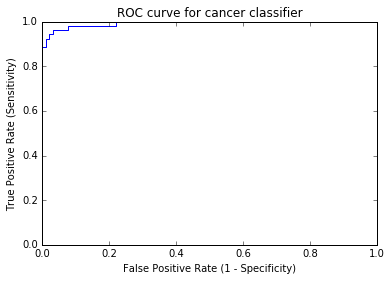

In [55]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC curve for cancer classifier")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.show()

* ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context
* You can't actually see the thresholds used to generate the curve on the ROC curve itself

In [56]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [57]:
evaluate_threshold(0.5)

Sensitivity: 0.9230769230769231
Specificity: 0.978021978021978


In [58]:
evaluate_threshold(0.3)

Sensitivity: 0.9423076923076923
Specificity: 0.967032967032967


### Independent Practice
Plot the ROC Curve and calculate the AUC for the diabetes dataset for a classifier of your choice.

*What classification accuracy threshold do you recommend?*

In [93]:
from sklearn.svm import SVC

In [94]:
diabetes = pd.read_csv("data/diabetes.csv")

In [95]:
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [96]:
X = diabetes.iloc[:, :8]

In [97]:
y = diabetes.label

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [99]:
std = StandardScaler()

In [100]:
clf = SVC(kernel='rbf', gamma=0.00001, C=1000,probability=True)

In [101]:
clf.fit(X, y)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1e-05, kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [102]:
clf_test = clf.predict(X_test)

In [103]:
clf_test

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [104]:
clf_proba = clf.predict_proba(X_test)[:, 1]

In [105]:
fpr, tpr, thresholds = metrics.roc_curve(clf_test, clf_proba)

In [108]:
roc_auc = metrics.auc(fpr, tpr)

In [110]:
print(roc_auc)

1.0


AttributeError: module 'sklearn.metrics' has no attribute 'roc_auc'

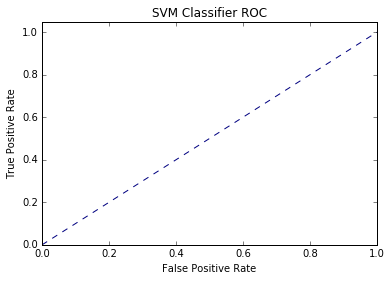

In [109]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % metrics.roc_auc)
plt.legend(loc="lower right")
plt.show()

**Confusion matrix advantages:**
* Allows you to calculate a variety of metrics
* Useful for multi-class problems (more than two response classes)


**ROC/AUC advantages:**
* Does not require you to set a classification threshold
* Still useful when there is high class imbalance

### Other useful things to look at
* **Learning/Validation Curves:** how does the evaluation metric change as a function of training data set size? (cost-benefit analysis of getting more data)
* **Sensitivity Analysis:** how does the evaluation metric change as a function of key learning parameters?

## Independent Work
Combine what we learned here about evaluation metrics with what we learned in the hyperparameter tuning lesson.
* Fit a classifier of your choice on a dataset of your choice (or use the cancer dataset) using k-fold cross validation and get accuracy, ROC/AUC, and recall.
* Using grid search, optimize for best ROC/AUC score.